In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family']='DFKai-SB' #顯示中文

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

目的: 匯入函式/模組

1. import : 匯入模組
2. pandas : 資料匯入、匯出、讀取...等
3. matplot: 繪製數學圖形
4. warnings: 去除python 警告
5. as __ : 將模組包進行縮寫，未來可以以縮寫方式進行模組內之function 呼叫 

In [3]:
train = pd.read_csv('C:/Users/HP/Downloads/input/train.csv', encoding = "utf-8", dtype = {'type': np.int32})
test = pd.read_csv('C:/Users/HP/Downloads/input/test.csv', encoding = "utf-8")
submission = pd.read_csv('C:/Users/HP/Downloads/input/submission.csv', encoding = "utf-8", dtype = {'type': np.int32})

目的: 資料匯入與探索
1. csv 資料匯入 (pd.read.csv)
2. 編碼調定為 utf-8 : encording 
3. dtype : 數值類型 (幾位元做計算)

In [4]:
train.head(3)
test.head(3)
submission.head(3)

,id,type
0,1,1
1,2,1
2,3,1


目的: 觀察變數與內部資料

1. head 意旨 觀察前三筆資料

In [5]:
df1 = pd.get_dummies(train['屬種'])
df1.sample(5)

,Iris-new_type,Iris-setosa,Iris-versicolor,Iris-virginica
85,0,0,0,1
52,0,0,1,0
0,0,1,0,0
77,0,0,1,0
47,0,0,1,0


目的: 將每一筆資料的文字屬性設定為 dummy variable
詳細內容請看 http://biostatdept.cmu.edu.tw/doc/epaper_a/paper/teaching_corner_034-1.pdf

In [6]:
df2 = train['屬種'].replace({'Iris-setosa':1, 'Iris-versicolor':2, 'Iris-virginica':3})
df2.sample(5)

73    2
88    3
61    2
15    1
96    3
Name: 屬種, dtype: object

目的: 將每一筆資料的文字屬性取代(replace)為 類別變數

In [7]:
miss_sum = train.isnull().sum().sort_values(ascending = False)
miss_sum

花萼寬度    1
花萼長度    1
type    0
屬種      0
花瓣寬度    0
花瓣長度    0
id      0
dtype: int64

目的: 確認有多少筆空值
.isnull().sum(): 欄目中之空值數計算
.sort_values(ascending = False): 排序

In [8]:
print(train[train['花萼寬度'].isnull()])
print("------------------------------")
print(train[train['花萼長度'].isnull()])

      id  花萼長度  花萼寬度  花瓣長度  花瓣寬度             屬種  type
121  122   5.2   NaN   5.1   1.8  Iris-new_type     4
------------------------------
      id  花萼長度  花萼寬度  花瓣長度  花瓣寬度             屬種  type
120  121   NaN   3.0   4.9   1.2  Iris-new_type     4


查詢哪一筆資料為空值

In [9]:
train_d_na = train.dropna().reset_index(drop=True)
train_d_na.isnull().sum().sort_values(ascending=False)

type    0
屬種      0
花瓣寬度    0
花瓣長度    0
花萼寬度    0
花萼長度    0
id      0
dtype: int64

NaN drop: 若空值很少，可以忽略遺失值

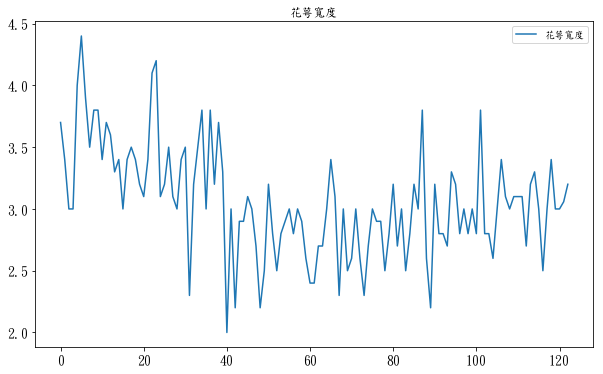

In [10]:
train[['花萼寬度']] = train[['花萼寬度']].fillna(np.mean(train[['花萼寬度']]))

train.plot(kind='line',y='花萼寬度',figsize=(10,6),fontsize=14,title='花萼寬度')

折線圖繪製:
    1. kind: 繪圖樣式(點、線、面)
    2. figsize : 圖形大小
    3. mean: 平均值

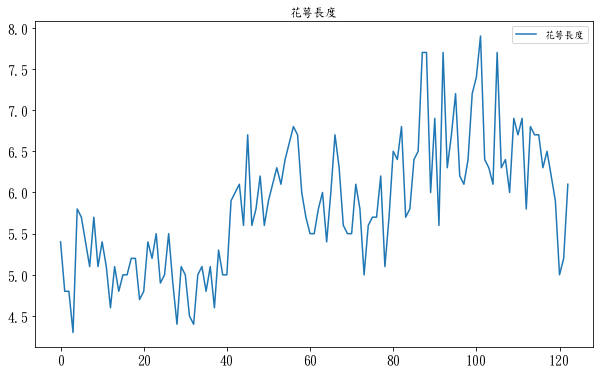

In [11]:
train[['花萼長度']] = train[['花萼長度']].fillna(train['花萼長度'].mode()[0])

train.plot(kind='line',y='花萼長度',figsize=(10,6),fontsize=14,title='花萼長度')

折線圖繪製:
    1. kind: 繪圖樣式(點、線、面)
    2. figsize : 圖形大小
    3. mode: 眾數

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BACBB50A20>,
      dtype=object)

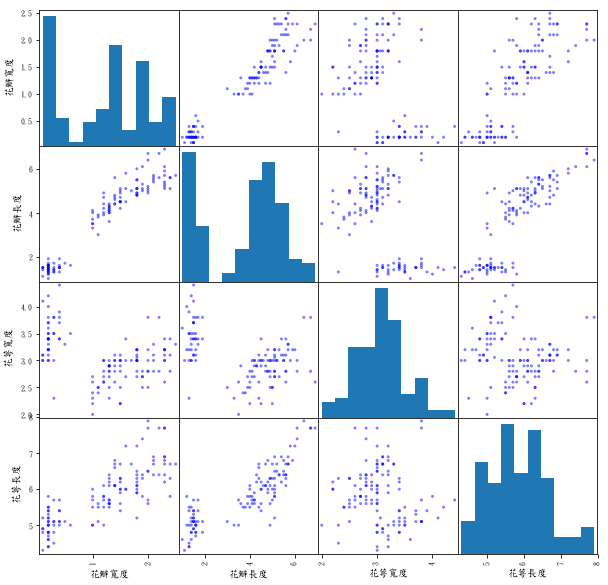

In [12]:
from pandas.plotting import scatter_matrix
scatter_matrix( train[['花瓣寬度','花瓣長度','花萼寬度','花萼長度']],figsize=(10, 10),color='b')

目的: 利用XY散佈圖進行變數間之比較
程式:
    1. scatter_matrix 矩陣

In [13]:
corr = train[['花瓣寬度','花瓣長度','花萼寬度','花萼長度']].corr()
print(corr)

          花瓣寬度      花瓣長度      花萼寬度      花萼長度
花瓣寬度  1.000000  0.958595 -0.367957  0.810219
花瓣長度  0.958595  1.000000 -0.436213  0.850649
花萼寬度 -0.367957 -0.436213  1.000000 -0.130174
花萼長度  0.810219  0.850649 -0.130174  1.000000


目的: 各變數間之相關係數
程式撰寫過程中，需針對特定變數進行標記，而後寫入 .corr

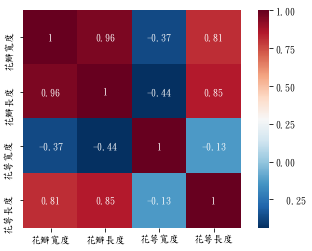

In [14]:
import seaborn as sns
sns.heatmap(corr, square=True, annot=True, cmap="RdBu_r") #center=0, cmap="YlGnBu"

目的:利用冷熱區分析，觀察各變數之正負相關性

Text(0.5,1,'測:花萼長度')

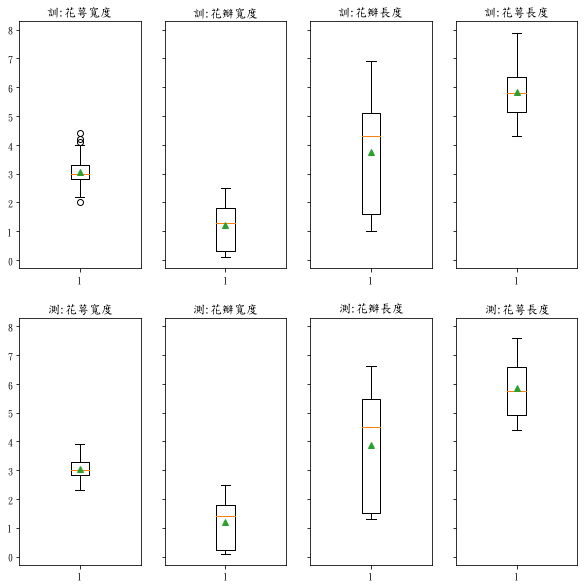

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 10), sharey=True)

axes[0, 0].boxplot(train['花萼寬度'],showmeans=True)
axes[0, 0].set_title('訓:花萼寬度')

axes[0, 1].boxplot(train['花瓣寬度'],showmeans=True)
axes[0, 1].set_title('訓:花瓣寬度')

axes[0, 2].boxplot(train['花瓣長度'],showmeans=True)
axes[0, 2].set_title('訓:花瓣長度')

axes[0, 3].boxplot(train['花萼長度'],showmeans=True)
axes[0, 3].set_title('訓:花萼長度')

axes[1, 0].boxplot(test['花萼寬度'],showmeans=True)
axes[1, 0].set_title('測:花萼寬度')

axes[1, 1].boxplot(test['花瓣寬度'],showmeans=True)
axes[1, 1].set_title('測:花瓣寬度')

axes[1, 2].boxplot(test['花瓣長度'],showmeans=True)
axes[1, 2].set_title('測:花瓣長度')

axes[1, 3].boxplot(test['花萼長度'],showmeans=True)
axes[1, 3].set_title('測:花萼長度')

建立盒鬚圖
    1. sharely:調整Y軸 label 為一致

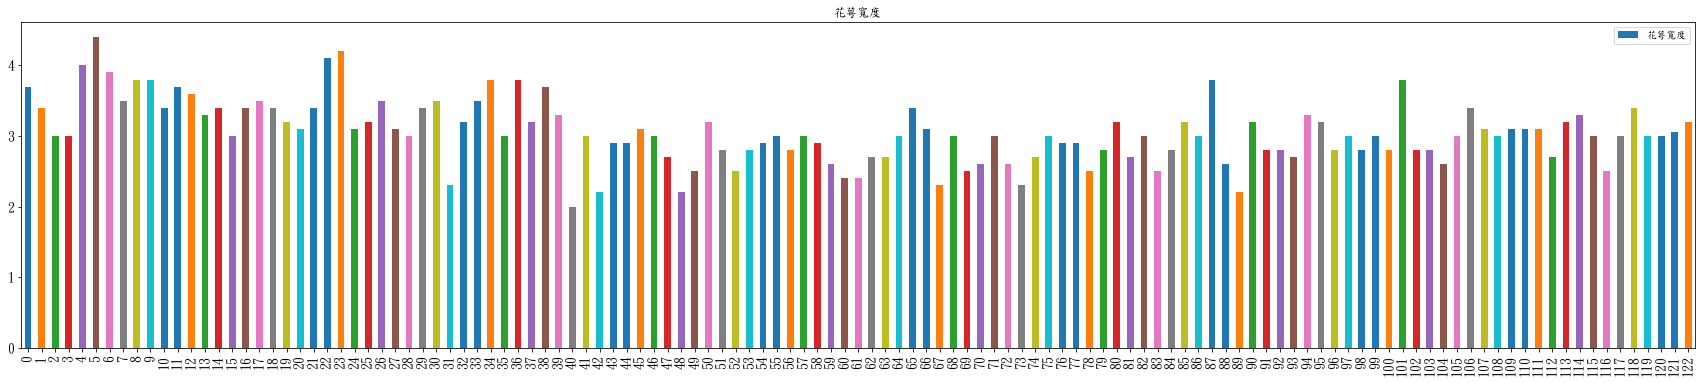

In [16]:
train.plot(kind='bar',y='花萼寬度',figsize=(30,6),fontsize=14,title='花萼寬度')

建立長條圖

In [17]:
IQR = np.percentile(train['花萼寬度'],75) - np.percentile(train['花萼寬度'],25)

計算"第三與第一的四分位數差"

percentile: 信賴區間之%值

In [18]:
train[train['花萼寬度'] > np.percentile(train['花萼寬度'],75)+1.5*IQR]

,id,花萼長度,花萼寬度,花瓣長度,花瓣寬度,屬種,type
5,6,5.7,4.4,1.5,0.4,Iris-setosa,1
22,23,5.2,4.1,1.5,0.1,Iris-setosa,1
23,24,5.5,4.2,1.4,0.2,Iris-setosa,1


目的: 挑出離群值

條件為 數值 大於 第三四分位數 + 1.5 倍 第三與第一的四分位數差

In [19]:
train[train['花萼寬度'] < np.percentile(train['花萼寬度'],25)-1.5*IQR]

,id,花萼長度,花萼寬度,花瓣長度,花瓣寬度,屬種,type
40,41,5.0,2.0,3.5,1.0,Iris-versicolor,2


目的: 挑出離群值

條件為 數值 小於 第一四分位數 - 1.5 倍 第三與第一的四分位數差

In [20]:
train = train[train['type']!=4]

目的: 去除干擾變數

In [21]:
from  sklearn.model_selection  import train_test_split

X = train[['花瓣寬度','花瓣長度','花萼寬度','花萼長度']]
y = train['type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=100)

目的: 切分資料 (分成 70%資料訓練、30%資料測試)

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

目的: 資料標準化 

詳細公式: https://blog.csdn.net/u012609509/article/details/78554709

In [23]:
X_train_std[0:5]

array([[ 0.82172682,  1.27937769,  0.47468749,  1.65481456],
       [ 1.36523117,  1.04600587, -0.44195042,  0.65747341],
       [-1.35229059, -1.2877124 ,  0.24552801, -1.33720889],
       [ 0.41409855,  0.22920447,  0.01636853,  0.03413519],
       [-1.08053842, -1.46274127,  2.07880383, -0.58920303]])

In [24]:
y_test[0:5]

69     2
54     2
37     1
46     2
106    3
Name: type, dtype: int32

In [25]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors=3, weights='uniform')
knn.fit(X_train_std, y_train)

print(metrics.classification_report(y_test, knn.predict(X_test_std)))
print(metrics.confusion_matrix(y_test, knn.predict(X_test_std)))

             precision    recall  f1-score   support

          1       1.00      1.00      1.00        14
          2       0.90      0.90      0.90        10
          3       0.92      0.92      0.92        12

avg / total       0.94      0.94      0.94        36

[[14  0  0]
 [ 0  9  1]
 [ 0  1 11]]


利用KNN 進行預測

In [26]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=500, criterion='gini', max_features='auto', oob_score=True)
rfc.fit(X_train, y_train) #不標準化

print("oob_score(accuary):",rfc.oob_score_)
print(metrics.classification_report(y_test, rfc.predict(X_test)))

oob_score(accuary): 0.9404761904761905
             precision    recall  f1-score   support

          1       1.00      1.00      1.00        14
          2       1.00      0.90      0.95        10
          3       0.92      1.00      0.96        12

avg / total       0.97      0.97      0.97        36



利用隨機森林進行預測

In [27]:

from  sklearn.naive_bayes  import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train_std, y_train)

print(metrics.classification_report(y_test, gnb.predict(X_test_std)))
print(metrics.confusion_matrix(y_test, gnb.predict(X_test_std)))

             precision    recall  f1-score   support

          1       1.00      1.00      1.00        14
          2       1.00      0.90      0.95        10
          3       0.92      1.00      0.96        12

avg / total       0.97      0.97      0.97        36

[[14  0  0]
 [ 0  9  1]
 [ 0  0 12]]


利用貝氏分類進行預測

In [28]:
from sklearn.svm import SVC

svc = SVC(C=1.0, kernel="rbf", probability=True)
svc.fit(X_train_std, y_train)

print(metrics.classification_report(y_test, svc.predict(X_test_std)))
print(metrics.confusion_matrix(y_test, svc.predict(X_test_std)))

             precision    recall  f1-score   support

          1       1.00      1.00      1.00        14
          2       1.00      0.90      0.95        10
          3       0.92      1.00      0.96        12

avg / total       0.97      0.97      0.97        36

[[14  0  0]
 [ 0  9  1]
 [ 0  0 12]]


利用SVM進行預測

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier
import xgboost as xgb

clf1 = KNeighborsClassifier(n_neighbors=3, weights='uniform')
clf2 = RandomForestClassifier(n_estimators=500, criterion='gini', max_features='auto', oob_score=True)
clf3 = GaussianNB()
clf4 = SVC(C=1.0, kernel="rbf", probability=True)
meta_clf = xgb.XGBClassifier(n_estimators= 2000, max_depth= 4)
stacking_clf = StackingClassifier(classifiers=[clf1, clf2, clf3, clf4], meta_classifier=meta_clf)

clf1.fit(X_train_std, y_train)
clf2.fit(X_train, y_train)
clf3.fit(X_train_std, y_train)
clf4.fit(X_train_std, y_train)
stacking_clf.fit(X_train_std, y_train)

print('KNN Score:',clf1.score(X_test_std, y_test))
print('RF Score:',clf2.score(X_test, y_test))
print('GNB Score:',clf3.score(X_test_std, y_test))
print('SVC Score:',clf4.score(X_test_std, y_test))
print('Stacking Score:',stacking_clf.score(X_test_std, y_test))

KNN Score: 0.9444444444444444
RF Score: 0.9722222222222222
GNB Score: 0.9722222222222222
SVC Score: 0.9722222222222222
Stacking Score: 0.9722222222222222


C:\Users\HP\Anaconda2\envs\k\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


測試 五種不同模型 之預測精準度，從上述可得知，KNN的Score 比其他來得低

In [30]:
import xgboost as xgb

gbm = xgb.XGBClassifier(n_estimators= 2000, max_depth= 4).fit(X_train, y_train)

print(metrics.classification_report(y_test, gbm.predict(X_test)))
print("Score:", gbm.score(X_test, y_test))

             precision    recall  f1-score   support

          1       1.00      1.00      1.00        14
          2       1.00      0.90      0.95        10
          3       0.92      1.00      0.96        12

avg / total       0.97      0.97      0.97        36

Score: 0.9722222222222222


C:\Users\HP\Anaconda2\envs\k\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\HP\Anaconda2\envs\k\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


利用Gradient Boosting 進行模型製作與測試

In [31]:
print(gbm.feature_importances_)

[0.23069175 0.1608462  0.5305574  0.07790463]


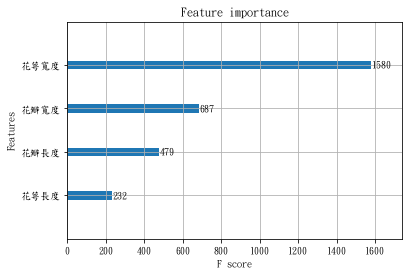

In [32]:
from xgboost import plot_importance
plot_importance(gbm, )
plt.show()

目的: 觀察何種參數最具有影響

In [33]:
pred = gbm.predict(test[['花瓣寬度','花瓣長度','花萼寬度','花萼長度']])

C:\Users\HP\Anaconda2\envs\k\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


目的: 利用Gradient Boosting預測資料

In [34]:
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 2, 3, 3, 3])

In [35]:
StackingSubmission = pd.DataFrame({ 'id': submission.id, 'type': pred })
StackingSubmission.to_csv("submission.csv", index=False)

目的: 資料儲存並匯出

In [36]:
submission = pd.read_csv('submission.csv', encoding = "utf-8", dtype = {'type': np.int32})
submission

,id,type
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
5,6,1
6,7,1
7,8,1
8,9,1
9,10,1


In [37]:
test[20:30]

,id,花萼長度,花萼寬度,花瓣長度,花瓣寬度
20,21,6.3,3.3,6.0,2.5
21,22,5.8,2.7,5.1,1.9
22,23,7.1,3.0,5.9,2.1
23,24,6.3,2.9,5.6,1.8
24,25,6.5,3.0,5.8,2.2
25,26,7.6,3.0,6.6,2.1
26,27,4.9,2.5,4.5,1.7
27,28,7.3,2.9,6.3,1.8
28,29,6.7,2.5,5.8,1.8
29,30,7.2,3.6,6.1,2.5


In [38]:
test_std = sc.transform(test[['花瓣寬度','花瓣長度','花萼寬度','花萼長度']])

目的: 測試test_std 的資料

In [39]:
submission_stk = stacking_clf.predict(test_std)
submission_stk

C:\Users\HP\Anaconda2\envs\k\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 2, 3, 3, 3])

利用stacking 進行預測

In [40]:
submission_rfc = rfc.predict(test[['花瓣寬度','花瓣長度','花萼寬度','花萼長度']])
submission_rfc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 2, 3, 3, 3])

利用隨機森林 進行預測

In [41]:
submission_knn =knn.predict(test_std)
submission_knn

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 2, 3, 3, 3])

利用KNN 進行預測

In [42]:
submission_gnb = gnb.predict(test_std)
submission_gnb

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 2, 3, 3, 3])

利用貝氏分類進行預測

In [43]:
submission_svc = svc.predict(test_std)
submission_svc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3])

利用SVM進行預測

In [44]:
from sklearn.ensemble import VotingClassifier
clf1 = knn
clf2 = rfc
clf3 = gnb
clf4 = svc

eclf = VotingClassifier(estimators=[('knn', clf1), ('rfc', clf2),('gnb', clf3),('svc',clf4)], voting='hard', weights=[1, 1, 1, 4])
eclf.fit(X_train_std, y_train)
print(metrics.classification_report(y_test, eclf.predict(X_test_std)))

             precision    recall  f1-score   support

          1       1.00      1.00      1.00        14
          2       1.00      0.90      0.95        10
          3       0.92      1.00      0.96        12

avg / total       0.97      0.97      0.97        36



C:\Users\HP\Anaconda2\envs\k\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


目的: 模型聚合，進行投票
詳細資料: https://blog.csdn.net/yanyanyufei96/article/details/71195063

In [45]:
submission_eclf = eclf.predict(test_std)
submission_eclf

C:\Users\HP\Anaconda2\envs\k\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3])

最終結果